# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
#define list of dictionary that will be used as column in new dataframe 
city_name=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]
lat=[]
lon=[]

#call url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


print('Beginning Data Retrieval')
print('------------------------')

# Build query url
query_url = f"{url}appid={weather_api_key}&units={units}&q="


for index, city in enumerate(cities):
    
    try:   
        response = requests.get(query_url + city).json()
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        date.append(response["dt"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        city_name.append(city)
        print(f"Processing record {index} | {city} ")
    except: 
        print("city not found")

            

#print log

Beginning Data Retrieval
------------------------
Processing record 0 | kapaa 
Processing record 1 | puerto ayora 
city not found
Processing record 3 | norman wells 
Processing record 4 | atuona 
Processing record 5 | arraial do cabo 
city not found
city not found
Processing record 8 | pisco 
Processing record 9 | chuy 
Processing record 10 | tasiilaq 
Processing record 11 | salta 
Processing record 12 | barrow 
Processing record 13 | tiksi 
Processing record 14 | cherskiy 
Processing record 15 | hermanus 
Processing record 16 | ishigaki 
Processing record 17 | kahului 
Processing record 18 | mount gambier 
Processing record 19 | poum 
Processing record 20 | khatanga 
Processing record 21 | moron 
Processing record 22 | vila velha 
Processing record 23 | berlevag 
Processing record 24 | vaini 
Processing record 25 | kavaratti 
Processing record 26 | bluff 
city not found
Processing record 28 | tecpan 
Processing record 29 | san borja 
Processing record 30 | tottori 
Processing record 3

Processing record 255 | micoud 
Processing record 256 | trondheim 
Processing record 257 | matamoros 
Processing record 258 | paramirim 
Processing record 259 | price 
Processing record 260 | gobabis 
Processing record 261 | mount isa 
Processing record 262 | kruisfontein 
Processing record 263 | burlington 
Processing record 264 | ust-kuyga 
Processing record 265 | breytovo 
Processing record 266 | imbituba 
Processing record 267 | mendi 
Processing record 268 | petropavlovsk-kamchatskiy 
Processing record 269 | chokurdakh 
Processing record 270 | mackay 
Processing record 271 | tombouctou 
Processing record 272 | korla 
Processing record 273 | faanui 
Processing record 274 | eureka 
Processing record 275 | maniitsoq 
Processing record 276 | lompoc 
city not found
Processing record 278 | seoul 
Processing record 279 | kavieng 
Processing record 280 | taoudenni 
Processing record 281 | beloha 
Processing record 282 | jacareacanga 
Processing record 283 | sagua la grande 
Processing rec

Processing record 501 | igarka 
Processing record 502 | belaya gora 
Processing record 503 | hasaki 
Processing record 504 | pesochnoye 
Processing record 505 | adrar 
Processing record 506 | mayo 
Processing record 507 | sovetskiy 
Processing record 508 | gela 
Processing record 509 | zakupne 
Processing record 510 | porvoo 
city not found
Processing record 512 | cabinda 
Processing record 513 | chester 
city not found
Processing record 515 | novoagansk 
Processing record 516 | lupiro 
Processing record 517 | ialibu 
Processing record 518 | yaan 
Processing record 519 | kangaatsiaq 
city not found
Processing record 521 | salgado 
Processing record 522 | nouakchott 
Processing record 523 | tambopata 
Processing record 524 | cairns 
Processing record 525 | ucluelet 
Processing record 526 | vila 
Processing record 527 | constitucion 
Processing record 528 | antalaha 
Processing record 529 | horconcitos 
Processing record 530 | baykit 
Processing record 531 | port-cartier 
Processing reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
#create data frame

weather_df=pd.DataFrame({"City" : city_name, 
          "Cloudiness": cloudiness,
         "Country" : country,
          "Date" : date,
           "Humidity" : humidity, 
           "Lat" : lat,
          "Lng" : lon,
          "Max Temp" : max_temp, 
           "Wind Speed":wind_speed
                        })
                    
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kapaa,40,US,1584236519,57,22.08,-159.32,80.60,14.99
1,puerto ayora,4,EC,1584236432,64,-0.74,-90.35,82.00,5.99
2,norman wells,90,CA,1584236565,85,65.28,-126.83,23.00,2.24
3,atuona,28,PF,1584236585,67,-9.80,-139.03,82.47,8.03
4,arraial do cabo,16,BR,1584236432,88,-22.97,-42.03,78.28,12.30
...,...,...,...,...,...,...,...,...,...
570,imeni poliny osipenko,0,RU,1584236683,62,52.42,136.49,17.85,2.51
571,moshupa,0,BW,1584236683,94,-24.78,25.42,68.00,3.36
572,hukuntsi,0,BW,1584236684,53,-24.00,21.75,72.27,7.07
573,humaita,99,BR,1584236684,98,-7.51,-63.02,73.71,4.59


In [35]:
weather_df.to_csv("output/cities.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

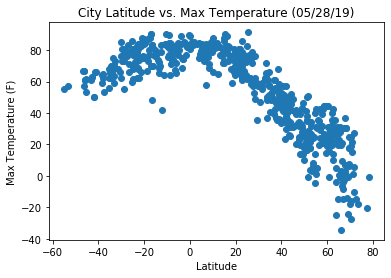

In [31]:
#temperature plot
latitude = weather_df["Lat"]
max_temp = weather_df["Max Temp"]

plt.savefig("output/temperature plot")

plt.scatter(latitude,max_temp)


plt.title("City Latitude vs. Max Temperature (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()


#### Latitude vs. Humidity Plot

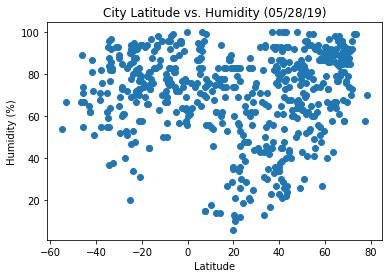

In [32]:
#humidity plot
latitude = weather_df["Lat"]
humidity = weather_df["Humidity"]

plt.scatter(latitude,humidity)

plt.savefig("output/Humidity")
plt.title("City Latitude vs. Humidity (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

#### Latitude vs. Cloudiness Plot

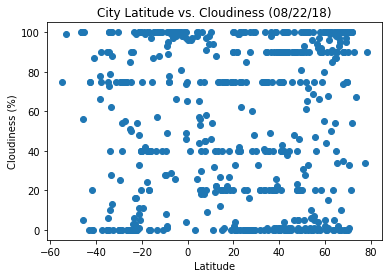

In [33]:
latitude = weather_df["Lat"]
cloudiness = weather_df["Cloudiness"]

plt.savefig("output/Cloudiness")

plt.scatter(latitude,cloudiness)

plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

#### Latitude vs. Wind Speed Plot

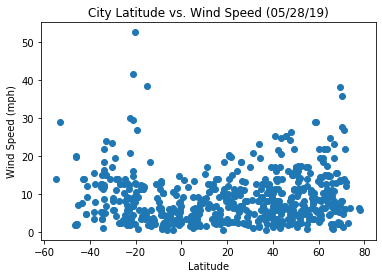

In [34]:
latitude = weather_df["Lat"]
wind_speed = weather_df["Wind Speed"]

plt.savefig("output/WindSpeed")

plt.scatter(latitude,wind_speed)

plt.title("City Latitude vs. Wind Speed (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

In [37]:
#Analysis
print(f"3 Analysis:")
print(f"1. Highest temperature will be near equator, located around 0 latitude")
print(f"2. Cloudiness varies around latitude")
print(f"3. Wind speed is distributed accross latitude" )

3 Analysis:
1. Highest temperature will be near equator, located around 0 latitude
2. Cloudiness varies around latitude
3. Wind speed is distributed accross latitude


## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames
#northern hemisphere is when latitude equals is positive value, using iloc

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


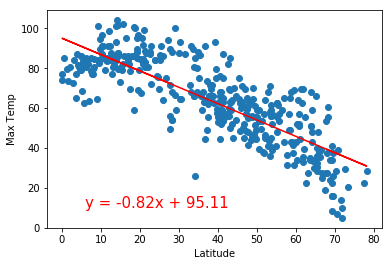

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


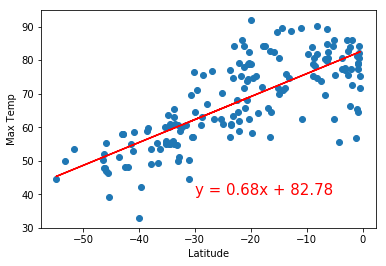

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


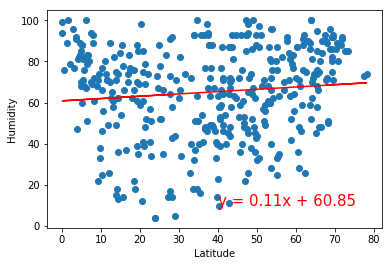

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


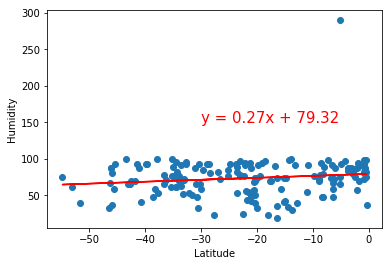

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


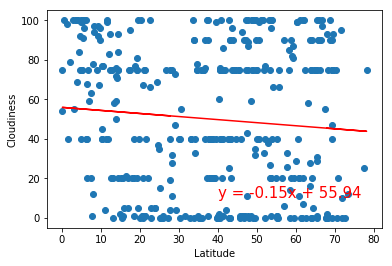

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


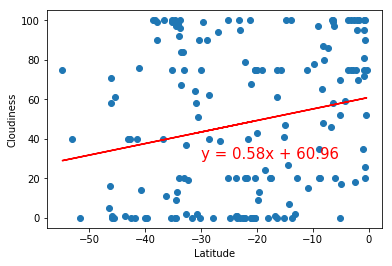

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


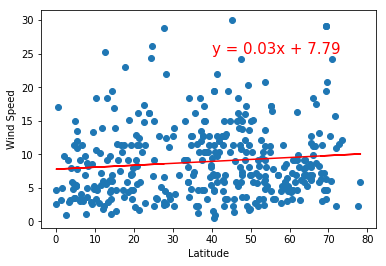

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


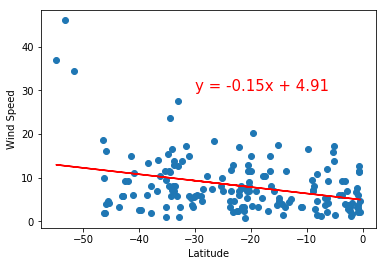